# Intake I part 3 - DKRZ Catalogs: ERA5 data

DKRZ intake catalogs cover different projects. This notebook describes the data project ERA5 and the catalog for the ERA5 data.

```{admonition} Overview
:class: dropdown

![Level](https://img.shields.io/badge/Level-Introductory-green.svg)


🎯 **objectives**: Get to know the ERA5 collection

⌛ **time_estimation**: "15min"

☑️ **requirements**: `intake_esm.__version__ == 2023.4.*`, at least 5GB memory.

© **contributors**: k204210

⚖ **license**:

```

```{admonition} Agenda
:class: tip

In this part, you learn

1. [what ERA5 is](#intro)
1. [how to find the collection](#find)
1. [browsing through the ERA5 collection](#browse)
1. [how to load ERA5 data with intake-esm](#access)
    
```

<a class="anchor" id="intro"></a>

## ERA5, its features and use cases

ERA ('ECMWF Re-Analysis') refers to a series of climate reanalysis datasets produced at the [European Centre for Medium-Range Weather Forecasts](http://www.ecmwf.int). Climate reanalyses combine observations with models to generatÏe consistent time series of multiple climate variables. [ERA5 (ERA fifth generation)](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5) is the latest climate reanalysis which is produced by Copernicus Climate Change Service (C3S) at ECMWF. It replaces ERA-Interim and other [predecessor ERA datasets](https://confluence.ecmwf.int/display/CKB/The+family+of+ERA5+datasets?src=contextnavpagetreemode) such as, e.g., ERA-40, ERA-15 and ERA-20C.

Contracted by the [German Meteorological Service](https://www.dwd.de/DE/Home/home_node.html), the World Data Centre for Climate (WDCC) at DKRZ is the German distributor of a [selection of these data](https://docs.dkrz.de/doc/dataservices/finding_and_accessing_data/era_data/index.html).

> ERA5 is a global comprehensive reanalysis, from 1979 to near real time. The period 1959 to 1979 was only recently released and is currently being transferred to DKRZ. 

### Features

- Spatial resolution is about **31 km** globally
- Dependent on the parameter, the data are stored on a **reduced Gaussian Grid (N320)** <br> or as **spectral coefficients** (with a triangular truncation of **T639**)
- Provided on 137/37 different **model/pressure** levels
- Temporal coverage from **1940 up to today** (1959-1979 newly released) 
- Temporal resolution from hourly, daily to monthly

### Use cases

ERA5 data have a broad range of applications, some of which are

- forcing of (regional) climate models,
- evaluation of climate models with reanalysis,
- comparison of weather observations to data of other scientific fields.

### Further information

- [General ERA5 data documentation](https://confluence.ecmwf.int/display/CKB/ERA5:+data+documentation)
- [List of parameters/codes/definitions from the parameter database by code/table numbers](https://apps.ecmwf.int/codes/grib/param-db)
- [List of params/codes/defs from the parameter DB by parameter types, incl explanations](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Parameterlistings)
- [Conversion table for accumulated variables (total precipitation/fluxes)](https://confluence.ecmwf.int/pages/viewpage.action?pageId=197702790)
- [ERA5 data in DKRZ's /pool/data](https://docs.dkrz.de/doc/dataservices/finding_and_accessing_data/era_data/index.html)

Please mail to data [at] dkrz [dot] de and visit the [DKRZ Webpage](https://www.dkrz.de/up/de-services/de-data-management/de-projects_cooperations/de-era/de-era)



<a class="anchor" id="find"></a>

## Find and open the collection

First of all, we need to import the required packages

In [1]:
import intake

We use intake to open the main catalog which includes all project catalogs and sub catalogs.

`intake` **opens** catalogs for data sources given in `yaml` format. These contain information about plugins and sources required for accessing and loading the data. The command is `open_catalog`:

In [2]:
#dkrz_catalog=intake.open_catalog(["https://dkrz.de/s/intake"])
#
#only for the web page we need to take the original link:
dkrz_catalog=intake.open_catalog(["https://gitlab.dkrz.de/data-infrastructure-services/intake-esm/-/raw/master/esm-collections/cloud-access/dkrz_catalog.yaml"])

Use `print` and `list` to find out what the catalog contains:

In [3]:
list(dkrz_catalog)

['dkrz_cmip5_archive',
 'dkrz_cmip5_disk',
 'dkrz_cmip6_cloud',
 'dkrz_cmip6_disk',
 'dkrz_cordex_disk',
 'dkrz_dyamond-winter_disk',
 'dkrz_era5_disk',
 'dkrz_monsoon_disk',
 'dkrz_mpige_disk',
 'dkrz_nextgems_disk',
 'dkrz_palmod2_disk']

We now focus on the ERA5 collection

In [4]:
col=dkrz_catalog.dkrz_era5_disk

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/intake_esm/cat.py:264: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [5]:
col.description

"This is an ESM collection for ERA5 data accessible on the DKRZ's disk storage system in /work/bk1099/data/"

Now, we print the variable `col` to see information on the data assets properties and associated metadata (e.g. which institution the data come from).

In [6]:
col

,unique
project,1
era_id,3
dataType,2
level_type,3
frequency,3
stepType,4
table_id,2
code,116
validation_date,31499
initialization_date,31500


The ERA5 catalog consists of 16 datasets from about 3,6mio assets/files.

<a class="anchor" id="browse"></a>

## ERA5 collection's facets

The **ERA5 Catalog** enables to browse through the data base using **10 search facets**. We could group them into 4 categories:

*Basic* data information:
- `era_id`:   Three type of ERA data are available:
    - `E5`: ERA5 data
    - `E1`: ERA5.1 data (corrected ERA5 data of the years 2000 to 2006)
    - `ET`: ERA5T is a provisional, early-release version of the ERA5 data
- `dataType`: Two data types are available: **An**alysis data are *pure* analysis and only contain intensive data (like temperature). **F**ore**c**ast data contain extensive data (like precipitation) which are accumulated quantities.
- `uri`:     Corresponds to the path on DKRZ's HPC file system.

Information on the *type of vertical level*:
- `level_type`: Three types are available: **model_level**, **pressure_level** or **surface**

*Temporal* information. The ERA5 database starts in January 1979 (the years until 1959 are currently being added). 
- `stepType`:            Is the variable accumulated, instantaneous or averaged?
- `frequency`:           What is the temporal resolution of the data? The database contains hourly, daily and monthly data.
- `validation_date`:     The date when the analysis is valid.
- `initialization_date`: The date when the forecast started.

*Variable* identifier (redundant) and attributes:
- `code`       : Corresponds to the GRIB code of the variable in the file.
- `table_id`   : Specifies which GRIB code table associated with the Grib code.   

If you require more information on the variables, the catalog can be loaded with more columns. You can find out additional era5 attributes from the main catalog via:

In [7]:
dkrz_catalog.metadata["parameters"]["additional_era5_disk_columns"]

{'default': ['path', 'units', 'long_name', 'short_name'], 'type': 'list[str]'}

You can load these into the catalog by providing a keyword argument:

In [8]:
cols=dkrz_catalog._entries["dkrz_era5_disk"]._open_args["read_csv_kwargs"]["usecols"]+dkrz_catalog.metadata["parameters"]["additional_era5_disk_columns"]["default"]
col=dkrz_catalog.dkrz_era5_disk(read_csv_kwargs=dict(usecols=cols))

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/intake_esm/cat.py:264: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


- `short_name` : A short identifier similar to the netCDF variable name.
- `long_name`  : A longer description of the variable.
- `units`      : The units of the variable.

We can obtain more information on the individual elements by using e.g.

In [9]:
uniques=col.unique()
uniques["dataType"]

['an', 'fc']

The ERA5 database has two unique `dataTypes`: 
- **fc** for forecast. All files which contain "12" in their name are *forecast* data.
- **an** for analysis. All files which contain "00" in their name are *analysis* data.

In [10]:
uniques["frequency"]

['hourly', 'daily', 'invariant']

The ERA5 database contains data with **hourly**, **daily** and **monthly** `frequency`.

In [11]:
uniques["level_type"]

['model_level', 'pressure_level', 'surface']

The ERA5 database contains **surface** level (sfc) data. In addition, it contains vertically resolved data at **model levels** 
(ml, 137 levels) and at **pressure levels** (pl, 37 levels). 

In [12]:
uniques["stepType"]

['instant', 'avg', 'max', 'accum']

The ERA5 database covers six `stepType`s. This attribute is parsed from the GRIB attribute `GRIB_stepType`: 
- 'accum'
- 'max'
- 'avg'
- 'instant'

We can check which combinations of **dataType**, **level_type** and **frequency** exist by using the`groupby` function of the underlying `dataframe`:

In [13]:
list(col.df.groupby(["dataType", "level_type", "frequency"]).groups.keys())

[('an', 'model_level', 'hourly'),
 ('an', 'pressure_level', 'hourly'),
 ('an', 'surface', 'daily'),
 ('an', 'surface', 'hourly'),
 ('an', 'surface', 'invariant'),
 ('fc', 'surface', 'daily'),
 ('fc', 'surface', 'hourly'),
 ('fc', 'surface', 'invariant')]

### Browse through the ERA5 collection

We can **search** through the intake collection by using its `search` function. E.g., we can search for ERA5 data on *pressure_level* in *hourly* frequency by:

In [14]:
query=dict(level_type="pressure_level",
           frequency="hourly")
cat=col.search(**query)

The variable `cat` is a new *sub*-catalog i.e. a subset of the original catalog.<br>To see the variables contained in this sub-catalog, we print what unique variable *long names* exists :

In [15]:
cat.unique()["long_name"]

['Potential vorticity',
 'Specific rain water content',
 'Specific snow water content',
 'Geopotential',
 'Temperature',
 'U component of wind',
 'V component of wind',
 'Specific humidity',
 'Vertical velocity',
 'Vorticity (relative)',
 'Divergence',
 'Relative humidity',
 'Ozone mass mixing ratio',
 'Specific cloud liquid water content',
 'Specific cloud ice water content',
 'Fraction of cloud cover']

We can select a specific variable by another `search`, e.g. for *Temperature*.<br>We can also subset the temporal coverage that we are interested in. intake allows using **wildcards** in the search.<br>In the sub-catalog of hourly pressure level data, we can search e.g. for temperature data that are valid for January 1980 using:

In [16]:
temp_hourly_pl=cat.search(long_name="Temperature",
                         validation_date="1980-01.*")

We print the variable's short name:

In [17]:
temp_hourly_pl.unique()["short_name"]

['t']

<a class="anchor" id="access"></a>

## Open multiple ERA5 files as `xarray` datasets

We can open the *entire* selection at once with `to_dataset_dict`. The result will be a `dict`ionary of `xarray` datasets.
For this, we have to specify a configuration for `xarray` via the `xarray_open_kwargs` argument.
```python
cdf_kwargs={
    "engine":"cfgrib",
    "chunks":{
        "time":1
    }
}
```
The *engine* indicates what *backend* `xarray` has to use to open the files (*here: cfgrib since the ERA5 data are stored in GRIB format*). For high frequency 3d variables, we recommend to use small chunking of `dask`  arrays on the time axis which can be done by setting `chunks`. This approach **saves memory** and returns *futures* of arrays which are only computed and loaded if needed.

<br>
This may take a while. We can ignore warnings printed by the underlying `cfgrib` library.

In [18]:
%%capture

temp_hourly_pl_xr_dict=temp_hourly_pl.to_dataset_dict(
    xarray_open_kwargs={
        "engine":"cfgrib",
        "chunks":{
            "time":1
        }           
    }           
)
temp_hourly_pl_xr_dict

<br>The dictionary *temp_hourly_pl_xr_dict* has exactly one entry because *all files* of the sub-catalog temp_hourly_pl have been merged along the time axis. The default configurations that control operations on the sub-catalog can be parsed as follows:

In [19]:
temp_hourly_pl.esmcat.aggregation_control

AggregationControl(variable_column_name='short_name', groupby_attrs=['era_id', 'table_id', 'stepType', 'level_type', 'frequency'], aggregations=[Aggregation(type=<AggregationType.join_existing: 'join_existing'>, attribute_name='validation_date', options={'compat': 'override', 'coords': 'minimal', 'dim': 'time'}), Aggregation(type=<AggregationType.join_existing: 'join_existing'>, attribute_name='initialization_date', options={'compat': 'override', 'coords': 'minimal', 'dim': 'time'}), Aggregation(type=<AggregationType.union: 'union'>, attribute_name='short_name', options={})])

<br>Now, let's get our dataset and have a look. We extract the last (and only) entry from `temp_hourly_pl_xr_dict` using the `popitem` method. `popitem` returns a tuple of size 2. The first tuple (index 0) contains the key '128.0.instant.pressure_level.hourly', the second tuple (index 1) contains the dataset:

In [20]:
temp_hourly_pl_xr_dset=temp_hourly_pl_xr_dict.popitem()[1]

Please note that once the method `popitem` is applied upon temp_hourly_pl_xr_dict, it return an empty temp_hourly_pl_xr_dict dictionary.

*temp_hourly_pl_xr_dset* is an `xarray` dataset. We can take advantage of `xarray` techniques to e.g.
- **select** the 500hPa level and
- **calculate** the mean for the selected month January

In [21]:
t500mean=temp_hourly_pl_xr_dset.sel(isobaricInhPa=500.,
                           method="nearest").mean(dim="time")

How does the new xarray dataset t500mean look like?

In [22]:
t500mean

<xarray.Dataset>
Dimensions:        (values: 542080)
Coordinates:
    number         int64 0
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 500.0
    latitude       (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude      (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables:
    t              (values) float32 dask.array<chunksize=(542080,), meta=np.ndarray>

We see that the values of the data variable t are given as dask.array.<br>
Using `compute`, we manually trigger loading the data of this dataset into memory and to return a new dataset.

In [23]:
t500mean.compute()

<xarray.Dataset>
Dimensions:        (values: 542080)
Coordinates:
    number         int64 0
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 500.0
    latitude       (values) float64 89.78 89.78 89.78 ... -89.78 -89.78 -89.78
    longitude      (values) float64 0.0 20.0 40.0 60.0 ... 300.0 320.0 340.0
Dimensions without coordinates: values
Data variables:
    t              (values) float32 233.1 233.1 233.1 ... 238.0 238.0 238.0

Plotting the data with the `plot` function shows the zonal gradient of 500 hPa temperature (in K) in January 1980. The x-axis is a proxy for the latitude (North->South direction). The figure reflects mid-atmosphere temperature (500 hPa) strongly increases from the poles towards the Equator.

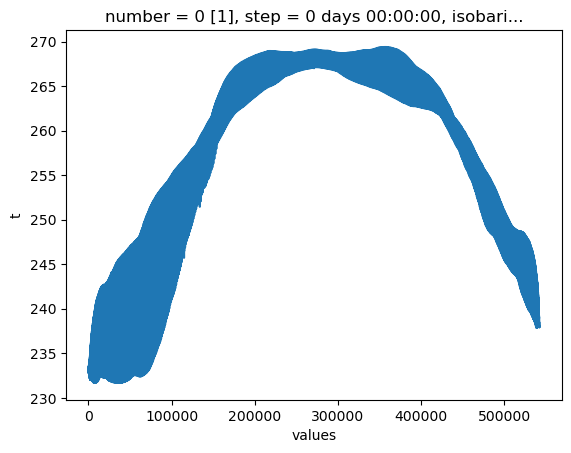

In [24]:
t500mean.t.plot()

P.S.: For Forecast variables, we recommend to define and use the following *preprocessing* function so that you generate a single time axis on the fly. You can apply this function by adding the `preprocess=pp` keyword argument to the `to_dataset_dict` function.

In [25]:
def pp(ds):
    if "depthBelowLandLayer" in ds.coords:
        del ds["depthBelowLandLayer"]
    import datetime as dt
    if "step" in ds.dims:
        corrected_list = []
        time0=ds.isel(time=0)["time"]
        time0hour=ds.isel(time=0)["time.hour"]
        timegroups=ds.groupby('time')
        for idx, (label,group) in enumerate(timegroups) :
            group["step"]=group["step"]+(group["time"]-time0)
            #default: 18h
            begin_step_hour=6
            end_step_hour=30

            if time0hour == 6 and time0.dt.year!=1940 :
                begin_step_hour=18
                end_step_hour=42
            elif time0hour == 6 and time0.dt.year==1940 :
                begin_step_hour=0
                end_step_hour=18

            group=group.where(
                (group["step"].dt.seconds/60/60+group["step"].dt.days*24)>begin_step_hour-1,
                drop=True
            )
            group=group.where(
                (group["step"].dt.seconds/60/60+group["step"].dt.days*24)<end_step_hour,
                drop=True
            )

            corrected_list.append(group)
        corrected_dset=xr.concat(corrected_list,dim="step")
        del corrected_dset["time"]
        return corrected_dset.rename(
            dict(
                #valid_time="time",
                step="time",
            )
        ).set_index(time="valid_time")
    return ds